# Advanced ML Case Study

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = wine.target

print("Dataset shape:", X.shape)
print("Classes:", np.unique(y))

Dataset shape: (178, 13)
Classes: [0 1 2]


## Train test split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
base_models = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('gb', GradientBoostingClassifier(random_state=42))
]

In [5]:
meta_model = LogisticRegression(max_iter=200)

## Stacking Classifier

In [6]:
stack_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=False
)

stack_model.fit(X_train, y_train)

,estimators,"[('rf', ...), ('knn', ...), ...]"
,final_estimator,LogisticRegre...(max_iter=200)
,cv,None
,stack_method,'auto'
,n_jobs,None
,passthrough,False
,verbose,0
,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2


## Prediction

In [7]:
y_pred = stack_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.3f}")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.972

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.97        14
           2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



## Confusion Matrix

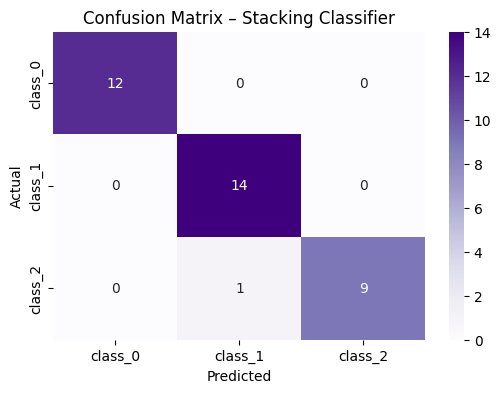

In [8]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples",
           xticklabels=wine.target_names,
           yticklabels=wine.target_names)
plt.title("Confusion Matrix – Stacking Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Model Comparison

C:\Users\ASUS\AppData\Local\Temp\ipykernel_45024\2260767011.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(scores.keys()), y=list(scores.values()), palette="viridis")


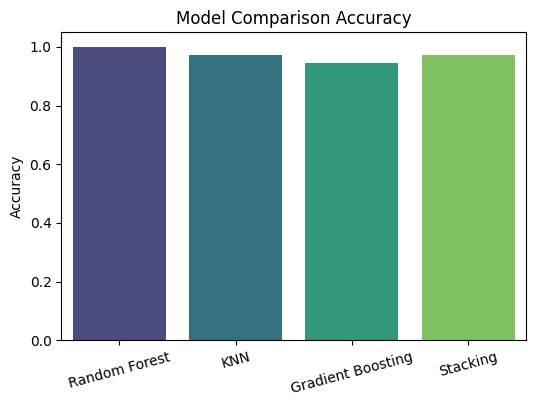

In [9]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Stacking": stack_model
}

scores = {}
for name, model in models.items():
    if name != "Stacking":
        model.fit(X_train, y_train)
    preds = model.predict(X_test)
    scores[name] = accuracy_score(y_test, preds)

plt.figure(figsize=(6,4))
sns.barplot(x=list(scores.keys()), y=list(scores.values()), palette="viridis")
plt.title("Model Comparison Accuracy")
plt.ylabel("Accuracy")
plt.xticks(rotation=15)
plt.show()